In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Models: ANN, ELM, SVR, KRR, RF, XGB
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

from mealpy.evolutionary_based.GA import BaseGA, MultiGA, EliteSingleGA, SingleGA
from mealpy.swarm_based.PSO import CL_PSO
from mealpy.swarm_based.MRFO import OriginalMRFO
from mealpy.swarm_based.SCSO import OriginalSCSO

from mealpy.utils.problem import Problem

Import the data

In [ ]:
rawdata = pd.read_excel("data.xlsx")

In [ ]:
import random

def fixed_randomization(data):
    np.random.seed(42) 
    rand_data = data.sample(frac=1).reset_index(drop=True)
    return rand_data

rand_data = fixed_randomization(rawdata)

In [ ]:
X_data_unscale = rand_data[rand_data.columns[0:15]]
Y_data_unscale = rand_data[rand_data.columns[15:20]]

Y_data = Y_data_unscale

In [ ]:
SS = StandardScaler()
MMS = MinMaxScaler()
X_data = SS.fit_transform(X_data_unscale)
X_data_scaled = pd.DataFrame(X_data, columns=X_data_unscale.columns)

# Now X_data_scaled has the same column names as X_data_unscale
X_data = X_data_scaled.copy()  # Optionally, you can directly overwrite X_data_scaled if you don't need it later


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

In [ ]:
y1_data = Y_data[Y_data.columns[0:1]]
y2_data = Y_data[Y_data.columns[1:2]]
y3_data = Y_data[Y_data.columns[2:3]]
y4_data = Y_data[Y_data.columns[3:4]]
y5_data = Y_data[Y_data.columns[4:5]]


y1_train = Y_train[Y_train.columns[0:1]]
y2_train = Y_train[Y_train.columns[1:2]]
y3_train = Y_train[Y_train.columns[2:3]]
y4_train = Y_train[Y_train.columns[3:4]]
y5_train = Y_train[Y_train.columns[4:5]]


y1_test = Y_test[Y_test.columns[0:1]]
y2_test = Y_test[Y_test.columns[1:2]]
y3_test = Y_test[Y_test.columns[2:3]]
y4_test = Y_test[Y_test.columns[3:4]]
y5_test = Y_test[Y_test.columns[4:5]]

In [ ]:
y_data = y1_data
y_train = y1_train
y_test = y1_test


model_y1 = SVR(C= 938266.6722022587, epsilon= 7.634680062462178, kernel= 'rbf', degree= 4, gamma= 0.00877730291334558)
model_y1.fit(X_data, y_data)

SVR(C=938266.6722022587, degree=4, epsilon=7.634680062462178,
    gamma=0.00877730291334558)

In [ ]:
y_data = y2_data
y_train = y2_train
y_test = y2_test


model_y2 = SVR(C= 71459.276928581, epsilon= 0.9031869098259523, kernel= 'rbf', degree= 1, gamma= 0.0035901390986543542)
model_y2.fit(X_data, y_data)

SVR(C=71459.276928581, degree=1, epsilon=0.9031869098259523,
    gamma=0.0035901390986543542)

In [ ]:
y_data = y3_data
y_train = y3_train
y_test = y3_test

y3_params = {'max_depth': 5, 'learning_rate': 0.21192829865979532, 'n_estimators': 513, 'min_child_weight': 1, 'gamma': 0.8354449115144676, 'subsample': 0.8559761007878783, 'colsample_bytree': 0.9499990399914706, 'reg_alpha': 0.061420625912146976, 'reg_lambda': 0.9727616243556757, 'random_state': 599}

model_y3 = XGBRegressor(**y3_params)
model_y3.fit(X_data, y_data)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9499990399914706, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.8354449115144676,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.21192829865979532,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=513, n_jobs=None,
             num_parallel_tree=None, random_state=599, ...)

In [ ]:
y_data = y4_data
y_train = y4_train
y_test = y4_test

y4_params = {'C': 435707.8208868281, 'epsilon': 0.25793769392540933, 'kernel': 'rbf', 'degree': 4, 'gamma': 0.0048393326352296085}

# model_y4 = SVR(**y4_params)

model_y4 = MLPRegressor(hidden_layer_sizes=(7, 28, 23, 19), activation='relu', alpha=0.9365945996054417, solver='lbfgs', random_state=72)

model_y4.fit(X_data, y_data)

MLPRegressor(alpha=0.9365945996054417, hidden_layer_sizes=(7, 28, 23, 19),
             random_state=72, solver='lbfgs')

In [ ]:
y_data = y5_data
y_train = y5_train
y_test = y5_test

y5_params = {'max_depth': 5, 'learning_rate': 0.12094846993062403, 'n_estimators': 373, 'min_child_weight': 1, 'gamma': 0.5612489423180769, 'subsample': 0.6088418632557075, 'colsample_bytree': 0.970259876095695, 'reg_alpha': 0.8003937597748307, 'reg_lambda': 0.4088069707067946, 'random_state': 255}


model_y5 = XGBRegressor(**y5_params)
model_y5.fit(X_data, y_data)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.970259876095695, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.5612489423180769,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.12094846993062403,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=373, n_jobs=None,
             num_parallel_tree=None, random_state=255, ...)

In [ ]:
# Define prediction functions
def A(X_data):
    return model_y1.predict(np.array(X_data).reshape(1, -1))

def B(X_data):
    return model_y2.predict(np.array(X_data).reshape(1, -1))

def C(X_data):
    return model_y3.predict(np.array(X_data).reshape(1, -1))

def D(X_data):
    return model_y4.predict(np.array(X_data).reshape(1, -1))





# Objective function
def obj_fun(solution):
    val1 = A(solution)
    val2 = B(solution)
    val3 = C(solution)
    val4 = D(solution)

    val = [val1, val2, val3, val4]
    val = [item for sublist in val for item in sublist]

    return val

# Define problem dictionary for genetic algorithm
problem_dict1 = {
    "fit_func": obj_fun,
    "lb": [X_data['G2B'].min(), X_data['Batt Store'].min(), X_data['B2G'].min(), X_data['PP1'].min(), X_data['Nuclear'].min(), X_data['Wind'].min(), X_data['PV'].min(), X_data['RH'].min(), X_data['CSP'].min(), X_data['ES1 Ch'].min(), X_data['ES1 Disch'].min(), X_data['ES1 Store'].min(), X_data['ES2 Ch'].min(), X_data['ES2 Disch'].min(), X_data['ES2 Store'].min()],
    "ub": [X_data['G2B'].max(), X_data['Batt Store'].max(), X_data['B2G'].max(), X_data['PP1'].max(), X_data['Nuclear'].max(), X_data['Wind'].max(), X_data['PV'].max(), X_data['RH'].max(), X_data['CSP'].max(), X_data['ES1 Ch'].max(), X_data['ES1 Disch'].max(), X_data['ES1 Store'].max(), X_data['ES2 Ch'].max(), X_data['ES2 Disch'].max(), X_data['ES2 Store'].max()],
    "minmax": "min",
    "obj_weights": [1, 1, 1, 1]
}

In [ ]:
epoch = 100
pop_size = 20
pc = 0.5
pm = 0.001
model = BaseGA(epoch, pop_size, pc, pm)
best_position, best_fitness = model.solve(problem_dict1)

print("Best Solution:")
print("X1:", best_position[0])
print("X2:", best_position[1])
print("Best Fitness:", best_fitness)

2024/05/20 12:38:17 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving 4-objective optimization problem with weights: [1 1 1 1].


2024/05/20 12:38:17 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 1, Current best: 115461.77853586267, Global best: 106519.51862918134, Runtime: 0.06792 seconds
2024/05/20 12:38:17 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 2, Current best: 113352.303907711, Global best: 106519.51862918134, Runtime: 0.06144 seconds
2024/05/20 12:38:17 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 3, Current best: 108860.78021967878, Global best: 106519.51862918134, Runtime: 0.05461 seconds
2024/05/20 12:38:17 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 4, Current best: 108860.78021967878, Global best: 106519.51862918134, Runtime: 0.04822 seconds
2024/05/20 12:38:17 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 5, Current best: 108106.59278358467, Global best: 106519.51862918134, Runtime: 0.04392 seconds
2024/05/20 12:38:17 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >Problem: P, Epoch: 6, Cu

Best Solution:
X1: -0.08204876589964616
X2: 0.15594775282985895
Best Fitness: 102564.1092593821


In [ ]:
print(model.solution[0])
print(f"fitness: {model.solution[1][0]}")
print(f"objective values: {model.solution[1][1]}")
print("Sum of variables:", sum(model.solution[0]))

[-0.08204877  0.15594775 -0.00367291  0.4247027   0.84494347  0.29067574
 -0.22331748  0.815149   -1.02562235 -0.44830675 -0.60883313 -1.03435034
 -0.12881452  0.08031999 -0.78065315]
fitness: 102564.1092593821
objective values: [102191.60348136353, 372.9751441425442, -0.64740944, 0.1780433150966563]
Sum of variables: -1.7238807264713558


In [ ]:
mm = [-0.08204877,  0.15594775, -0.00367291,  0.4247027,   0.84494347,  0.29067574,
 -0.22331748,  0.815149,   -1.02562235, -0.44830675, -0.60883313, -1.03435034,
 -0.12881452,  0.08031999, -0.78065315]

In [ ]:
MS = pd.DataFrame(mm)
MS_df = pd.DataFrame(MS)
MS = MS_df.T
s_mean = SS.mean_
s_scale = SS.scale_
Optimized_Inputs = (MS * s_scale) + s_mean
Optimized_Inputs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,26099.670835,33.003883,27420.408493,120451.678174,27206.547256,9599.635823,78492.167666,17850.745951,305.433389,49888.163504,44477.028365,19.056796,60657.830348,67707.482223,1240.742762


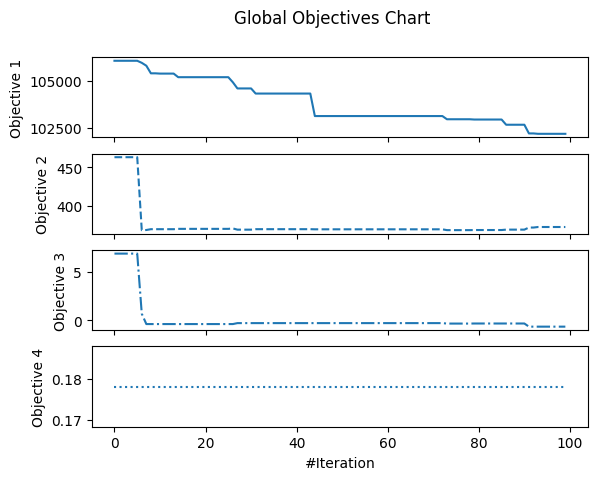

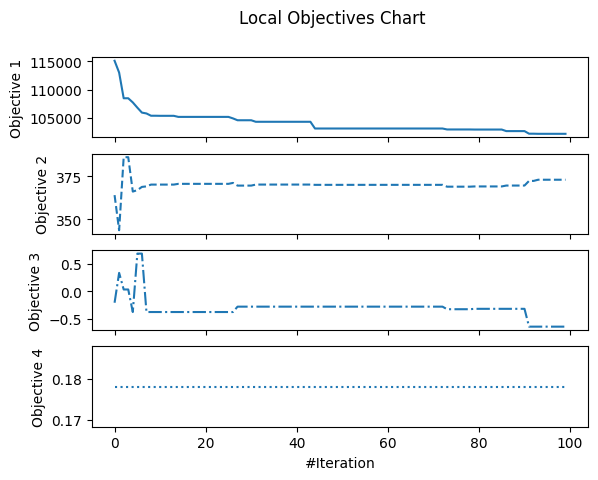

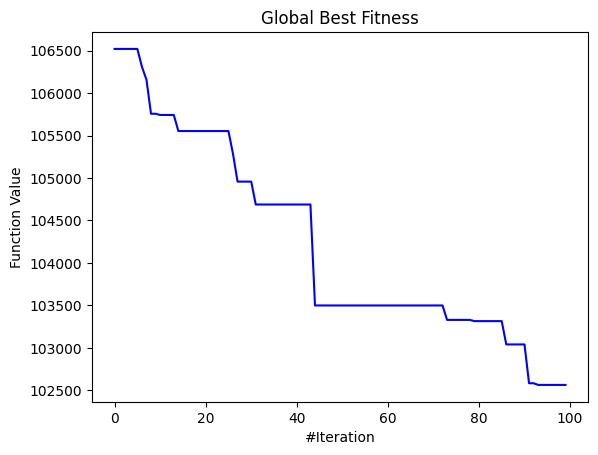

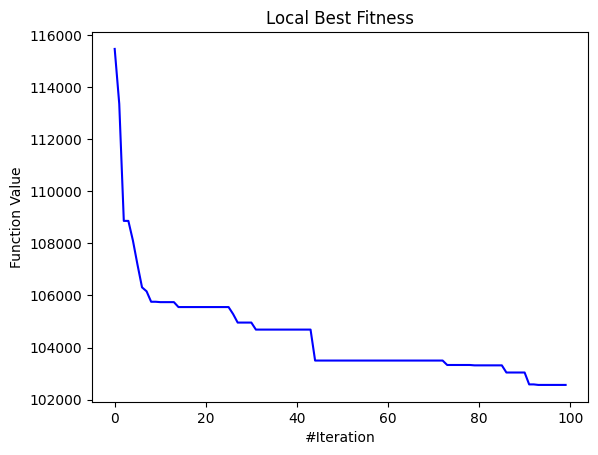

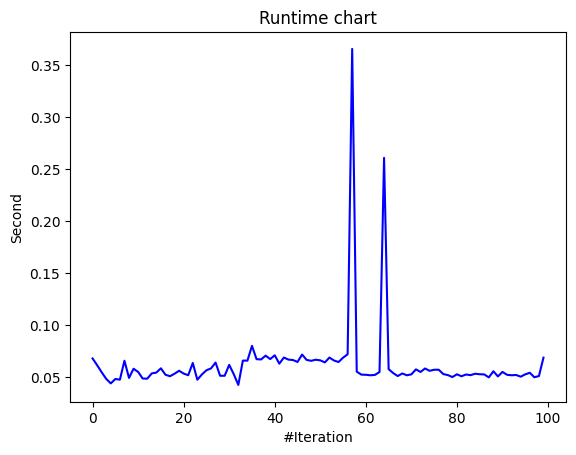

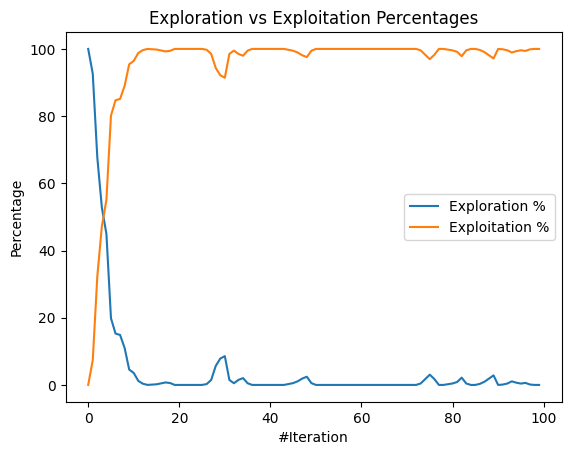

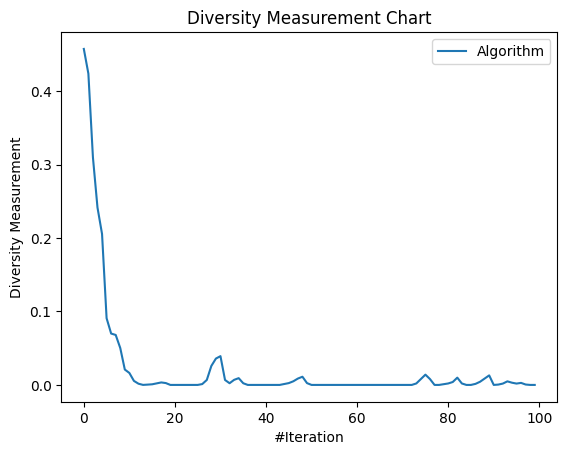

ValueError: Can't draw the trajectory because 'save_population' is set to False or the number of epochs is too small.

In [ ]:
model.history.save_global_objectives_chart(filename="hello/goc")
model.history.save_local_objectives_chart(filename="hello/loc")

model.history.save_global_best_fitness_chart(filename="hello/gbfc")
model.history.save_local_best_fitness_chart(filename="hello/lbfc")

model.history.save_runtime_chart(filename="hello/rtc")

model.history.save_exploration_exploitation_chart(filename="hello/eec")

model.history.save_diversity_chart(filename="hello/dc")

model.history.save_trajectory_chart(list_agent_idx=[3, 5, 6, 7,], selected_dimensions=[3, 4], filename="hello/tc")